In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


# Reflect Tables into SQLAlchemy ORM

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [4]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [5]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create a session
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [7]:
# To create a query for the last months of precipitation, get the most recent date on the data 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= prev_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_std_df = pd.DataFrame(results, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
prcp_std_df = prcp_df.sort_values("Date")
prcp_std_df.head(5)

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


Text(0, 0.5, 'Inches')

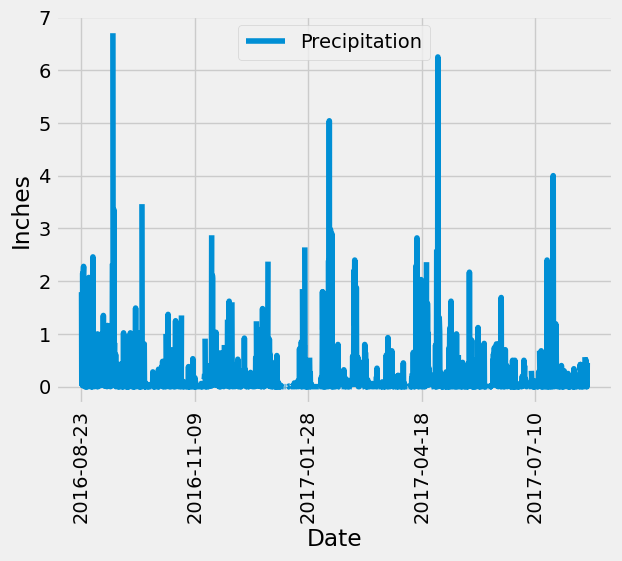

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_std_df.plot(x = "Date", y = "Precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_std_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
num_of_stations = len(session.query(Station.station).group_by(Station.station).all())
num_of_stations

9

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                  group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Add the results for most active stations to a DataFrame
active_stations_df = pd.DataFrame(active_stations, columns = ["Station", "Counts"])
active_stations_df

,Station,Counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# tobs = temperature observations
results_temp = [Measurement.station, func.min(Measurement.tobs),
               func.max(Measurement.tobs), func.avg(Measurement.tobs)]

temp_stats = session.query(*results_temp).filter(Measurement.station == "USC00519281").all()

temp_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [39]:
# Add the results temperature observations to a DataFrame
temp_stats_df = pd.DataFrame(temp_stats, columns = ["Station", "Lowest Temp", "Highest Temp", "Average Temp"])
temp_stats_df

,Station,Lowest Temp,Highest Temp,Average Temp
0,USC00519281,54.0,85.0,71.663781


In [40]:
# To create the query for the last 12 months of temperature, get the most recent date for station USC00519281
# mrd_USC00519281 = most recent date USC00519281
mrd_USC00519281 = session.query(Measurement.date).order_by(Measurement.date.desc())\
                .filter(Measurement.station == "USC00519281").first()

mrd_USC00519281.date

'2017-08-18'

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 18) - dt.timedelta(days=365)

# Perform a query to retrieve the data and temperature observation
results = session.query(Measurement.date, Measurement.tobs).filter\
          ((Measurement.station == 'USC00519281') & (Measurement.date>= prev_year)).all()

# Create the dataframe to plot the results as a histogram
tobs_df = pd.DataFrame(results, columns = ["Date", "tobs"])

prcp_df.head(5)

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


<Axes: ylabel='Frequency'>

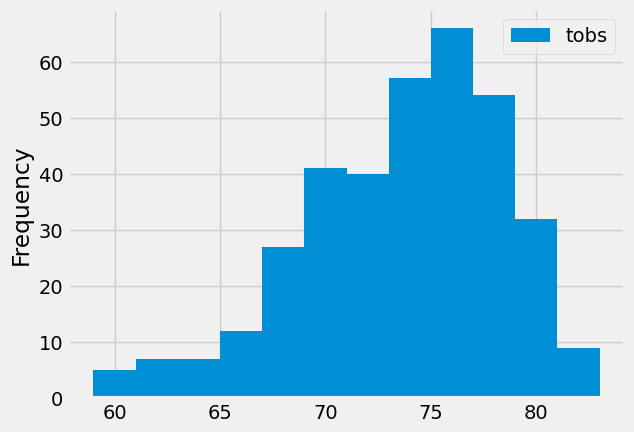

In [42]:
# plot the results as a histogram
tobs_df.plot.hist(bins=12)

# Close Session

In [44]:
# Close Session
session.close()
